# Angle and HLS plots

It is common to visualise magnetisation fields so that the color encodes the angle of magnetisation. In this tutorial, we are going to have a look at the ways this can be done in Ubermag. As an example, we are going to visualise a Neel skyrmion in a disk. For details on how to obtain a skyrmion, please refer to other tutorials.

In [1]:
import oommfc as mc
import discretisedfield as df
import micromagneticmodel as mm

region = df.Region(p1=(-50e-9, -50e-9, 0), p2=(50e-9, 50e-9, 10e-9))
mesh = df.Mesh(region=region, cell=(2.5e-9, 2.5e-9, 2.5e-9))

system = mm.System(name='skyrmion')

system.energy = (mm.Exchange(A=1.6e-11)
               + mm.DMI(D=4e-3, crystalclass='Cnv') 
               + mm.UniaxialAnisotropy(K=0.51e6, u=(0, 0, 1)) 
               + mm.Demag()
               + mm.Zeeman(H=(0, 0, 2e5)))

def Ms_fun(pos):
    """Function to set magnitude of magnetisation: zero outside cylindric shape, 
    Ms inside cylinder.
    
    Cylinder radius is 50nm.
    
    """
    x, y, z = pos
    if (x**2 + y**2)**0.5 < 50e-9:
        return 1.1e6
    else:
        return 0
    
def m_init(pos):
    """Function to set initial magnetisation direction: 
    -z inside cylinder (r=10nm),
    +z outside cylinder.
    y-component to break symmetry.
    
    """
    x, y, z = pos
    if (x**2 + y**2)**0.5 < 10e-9:
        return (0, 0, -1)
    else:
        return (0, 0, 1)
    

# create system with above geometry and initial magnetisation
system.m = df.Field(mesh, dim=3, value=m_init, norm=Ms_fun)

# minimize the energy
md = mc.MinDriver()
md.drive(system)

Running OOMMF (ExeOOMMFRunner) [2021/01/01 11:17]... (1.2 s)


We can now plot the skyrmion using `mpl`:

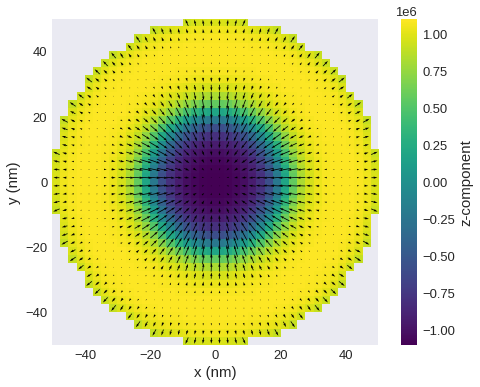

In [2]:
# Plot relaxed configuration: vectors in z-plane
system.m.plane('z').mpl()

In this plot, colour encodes the out-of-plane magnetisation component. The angle of magnetisation with respect to the horizontal axis of the plot can be computed by getting the `angle` property. Please note that in order for the angle to be computed, the field must be sliced using a plane beforehand.

In [3]:
system.m.plane('z').angle

Field(mesh=Mesh(region=Region(p1=(-5e-08, -5e-08, 3.7500000000000005e-09), p2=(5e-08, 5e-08, 6.25e-09)), n=(40, 40, 1), bc='', subregions={}), dim=1)

This returns a scalar field whose values are angles with respect to the $x$-axis. All values are in radians and in $[0, 2\pi]$ range. Since this is a scalar field, we can plot it like any other scalar field.

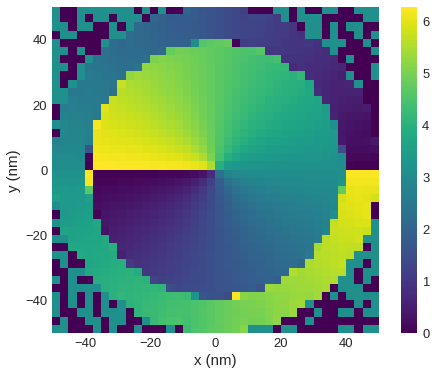

In [4]:
system.m.plane('z').angle.mpl()

Because by computing the scalar field, we lost the information of magnetisation norm, we have to pass `scalar_filter_field`.

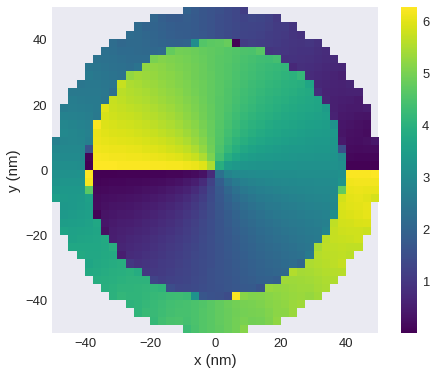

In [5]:
system.m.plane('z').angle.mpl(scalar_filter_field=system.m.norm)

The default colormap is not periodic, so we can choose a some of the periodic ones:

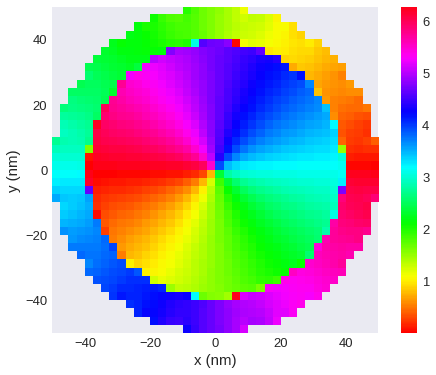

In [6]:
system.m.plane('z').angle.mpl(scalar_filter_field=system.m.norm, scalar_cmap='hsv')

Before we have a look at creating HLS plots, let us add the magnetisation vector to out plot:

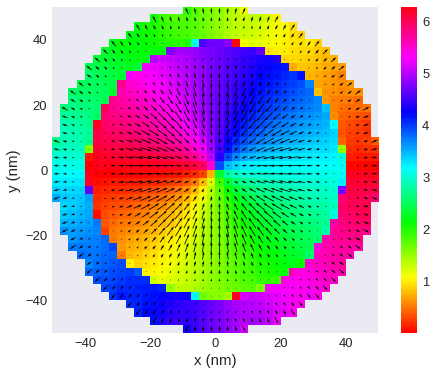

In [7]:
system.m.plane('z').angle.mpl(scalar_filter_field=system.m.norm,
                              scalar_cmap='hsv',
                              vector_field=system.m)

## HLS plot

HLS stands for hue-lightness-saturation. To plotting functions we can pass `lightness_field` to add more information to our plot. For example, let us start with `mpl_scalar` function.

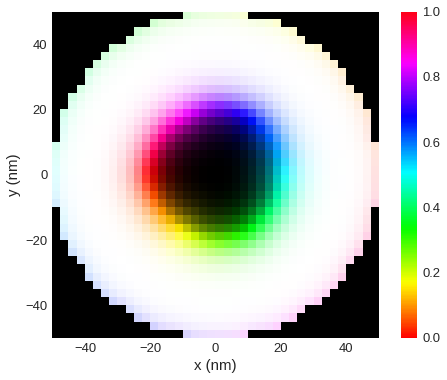

In [8]:
system.m.plane('z').angle.mpl_scalar(filter_field=system.m.norm,
                                     lightness_field=system.m.z)

From this plot, we can see that, in addition to angle, we also visualised the out-of-plane component of magnetisation by adding "lightness". We can also invert it by passing `-system.m.z`.

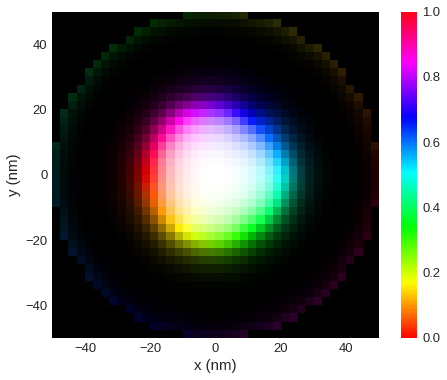

In [9]:
system.m.plane('z').angle.mpl_scalar(filter_field=system.m.norm,
                                     lightness_field=-system.m.z)

Finally, let us show how lightness can be defined in `mpl` convenience function.

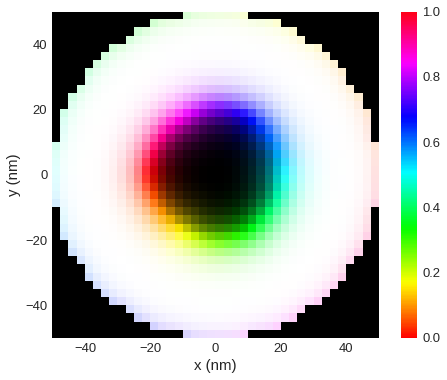

In [10]:
system.m.plane('z').angle.mpl(scalar_filter_field=system.m.norm,
                              scalar_lightness_field=system.m.z)

We can also add vectors to the plot:

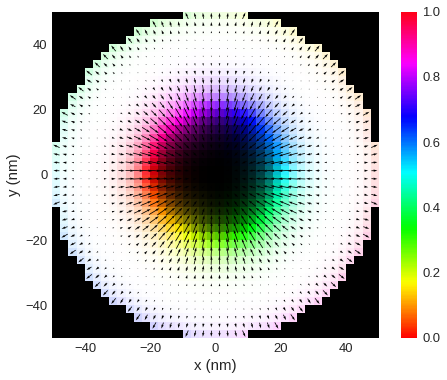

In [11]:
system.m.plane('z').angle.mpl(scalar_filter_field=system.m.norm,
                              scalar_lightness_field=system.m.z,
                              vector_field=system.m)

For customising plots, changing the discretisation of vector plots, please refer to other tutorials.